In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = dataset.iloc[:,3:5].values

In [4]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=3, min_samples=2)
DB.fit(x)

DBSCAN(eps=3, min_samples=2)

In [5]:
r= DB.labels_
r

array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [6]:
DB.leaf_size

30

In [7]:
y_means = DB.fit_predict(x)
y_means.shape

(200,)

In [8]:
Supervised = dataset
Supervised["Cluster_Group"] = y_means
Supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [9]:
Supervised.to_csv('groups.csv',index=False)

C:\Users\YAS\Anaconda3\envs\project-1\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


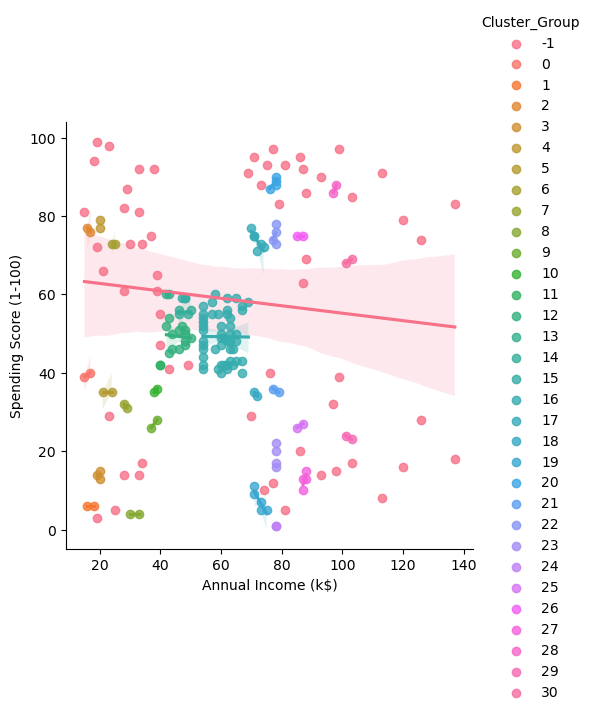

In [10]:
import seaborn as sns
graph = sns.lmplot(data=Supervised, x = Supervised.columns[3],y = Supervised.columns[4],  hue = Supervised.columns[5],
                   fit_reg=True,legend=True,legend_out=True)